# Conditional expectation

In [1]:
from symbulate import *
%matplotlib inline

## Dice rolling

In [2]:
P = BoxModel([1, 2, 3, 4], size = 2)
X = RV(P, sum)
Y = RV(P, max)

"(2, 1)",996
"(3, 2)",1933
"(4, 2)",1008
"(4, 3)",2028
"(5, 3)",1937
"(5, 4)",2007
"(6, 3)",1072
"(6, 4)",1996
"(7, 4)",2037
"(8, 4)",986
Total,16000


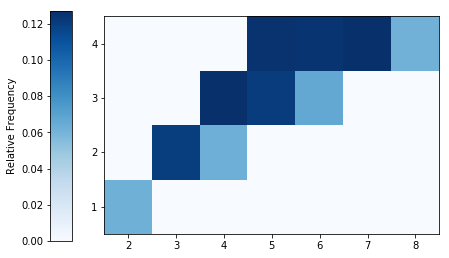

In [3]:
xy = (X & Y).sim(16000)
xy.plot('tile')
xy.tabulate()

In [4]:
print('x', 'E(Y|X=x)')
for x in range(2, 8+1):
    print(x, ( Y | (X == x) ).sim(10000).mean())


x E(Y|X=x)
2 1.0
3 2.0
4 2.6667
5 3.5013
6 3.6616
7 4.0
8 4.0


## Patterns in coin flips

In [5]:
P = BoxModel([1, 0], size = inf)
P.sim(5)

0,"(0, 1, 0, 0, 1, 1, ...)"
1,"(0, 0, 1, 0, 1, 1, ...)"
2,"(0, 0, 0, 0, 0, 0, ...)"
3,"(1, 0, 0, 0, 0, 0, ...)"
4,"(1, 0, 1, 0, 0, 1, ...)"


2.0181

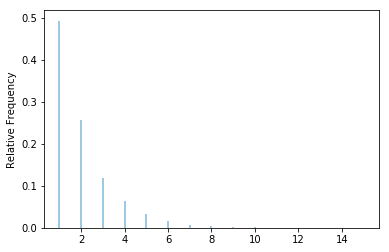

In [6]:
def flips_until_H(flips):
    for index, flip in enumerate(flips):
        if flip == 1:
            return index + 1 # +1 for zero-indexing

W_H = RV(P, flips_until_H)
w = W_H.sim(10000)
w.plot()
w.mean()

In [7]:
def flips_until_HT(flips):
    for i in list(range(1, 100)):
        if ( (flips[i] == 0) & (flips[i - 1] == 1) ):
                return i + 1 # +1 for zero-indexing

3.9945

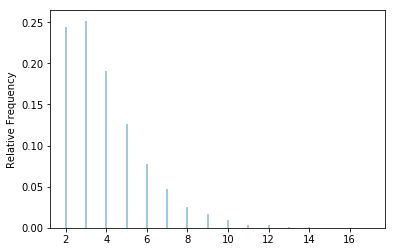

In [8]:
W_HT = RV(P, flips_until_HT)
w = W_HT.sim(10000)
w.plot()
w.mean()

In [9]:
def flips_until_HH(flips):
    for i in list(range(1, 100)):
        if ( (flips[i] == 1) & (flips[i - 1] == 1) ):
                return i + 1 # +1 for zero-indexing

5.963

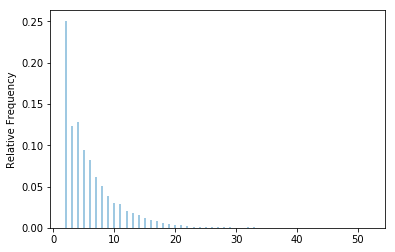

In [10]:
W_HH = RV(P, flips_until_HH)
w = W_HH.sim(10000)
w.plot()
w.mean()

# Random rectangle

((0.49412157699441334, 0.24583751962404884), 0.04118927539933955)

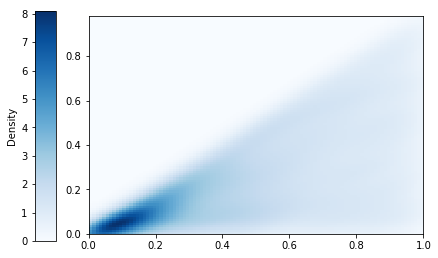

In [11]:
P = Uniform(0, 1) ** 2
X, U = RV(P)
Y = U * X
xy = (X & Y).sim(10000)
xy.plot('density')
xy.mean(), xy.cov()

In [12]:
(xy[0] * xy[1]).mean()

0.16266289828037

0.1011485060662385

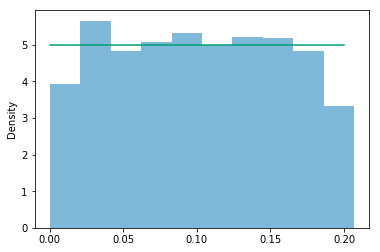

In [13]:
y = (Y | (abs(X - 0.2) < 0.01) ).sim(1000)
y.plot(bins=10)
Uniform(0, 0.2).plot()
y.mean()

0.020389936008510915

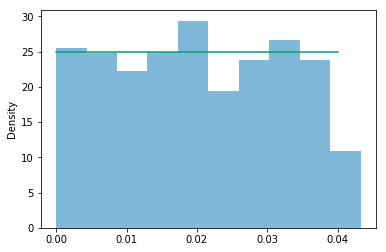

In [14]:
z = (X * Y | (abs(X - 0.2) < 0.01) ).sim(1000)
z.plot(bins=10)
Uniform(0, 0.2 * 0.2).plot()
z.mean()